In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.read_csv('arcene_train.data', sep=' ', header = None)
df.drop([10000], axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
4,105,0,141,348,0,268,329,0,0,1,...,813,0,0,0,0,190,301,0,0,354


In [6]:
df['labels'] = pd.read_csv('arcene_train.labels')

In [7]:
df.labels.value_counts()

-1.0    56
 1.0    43
Name: labels, dtype: int64

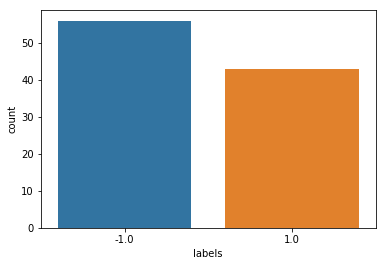

In [8]:
sns.countplot(df.labels)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,labels
0,0,71,0,95,0,538,404,20,0,0,...,570,86,0,36,0,80,0,0,524,-1.0
1,0,41,82,165,60,554,379,0,71,0,...,605,69,7,473,0,57,0,284,423,1.0
2,0,0,1,40,0,451,402,0,0,0,...,593,28,0,24,0,90,0,34,508,1.0
3,0,56,44,275,14,511,470,0,0,0,...,600,0,26,86,0,102,0,0,469,-1.0
4,105,0,141,348,0,268,329,0,0,1,...,0,0,0,0,190,301,0,0,354,-1.0


In [20]:
X = df.drop(['labels'], axis=1)
y = df['labels']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Raw data version

In [25]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

c:\users\symphonyai\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.65

In [26]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.55

In [29]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

## Dropping constant and duplicate columns

In [30]:
# check and remove constant columns
colsToRemove = []
for col in df.columns:
    if df[col].std() == 0: 
        colsToRemove.append(col)
        
# remove constant columns in the training set
df.drop(colsToRemove, axis=1, inplace=True)

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `80` Constant Columns

[113, 143, 215, 227, 303, 416, 436, 453, 466, 557, 592, 993, 1544, 1902, 1956, 2109, 2199, 2213, 2219, 2349, 2409, 2482, 2520, 2583, 2589, 3020, 3273, 3278, 3390, 3562, 3657, 3714, 3729, 4200, 4234, 4238, 4328, 4448, 4621, 4637, 4649, 4676, 4843, 4846, 4847, 5034, 5313, 5372, 5415, 5610, 5626, 5735, 5756, 5778, 5940, 6309, 6346, 6866, 6995, 7057, 7091, 7181, 7218, 7295, 7449, 7809, 7929, 8081, 8188, 8189, 8588, 8704, 8840, 8867, 8878, 9165, 9356, 9538, 9895, 9913]


In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,labels
0,0,71,0,95,0,538,404,20,0,0,...,570,86,0,36,0,80,0,0,524,-1.0
1,0,41,82,165,60,554,379,0,71,0,...,605,69,7,473,0,57,0,284,423,1.0
2,0,0,1,40,0,451,402,0,0,0,...,593,28,0,24,0,90,0,34,508,1.0
3,0,56,44,275,14,511,470,0,0,0,...,600,0,26,86,0,102,0,0,469,-1.0
4,105,0,141,348,0,268,329,0,0,1,...,0,0,0,0,190,301,0,0,354,-1.0


In [32]:
df = df.T.drop_duplicates().T

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,labels
0,0.0,71.0,0.0,95.0,0.0,538.0,404.0,20.0,0.0,0.0,...,570.0,86.0,0.0,36.0,0.0,80.0,0.0,0.0,524.0,-1.0
1,0.0,41.0,82.0,165.0,60.0,554.0,379.0,0.0,71.0,0.0,...,605.0,69.0,7.0,473.0,0.0,57.0,0.0,284.0,423.0,1.0
2,0.0,0.0,1.0,40.0,0.0,451.0,402.0,0.0,0.0,0.0,...,593.0,28.0,0.0,24.0,0.0,90.0,0.0,34.0,508.0,1.0
3,0.0,56.0,44.0,275.0,14.0,511.0,470.0,0.0,0.0,0.0,...,600.0,0.0,26.0,86.0,0.0,102.0,0.0,0.0,469.0,-1.0
4,105.0,0.0,141.0,348.0,0.0,268.0,329.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,190.0,301.0,0.0,0.0,354.0,-1.0


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [35]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

c:\users\symphonyai\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.65

In [36]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [38]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [39]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

## Proceeding with PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [43]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.55

In [44]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.55

In [46]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.55

In [47]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5